In [175]:
import pandas as pd
import numpy as np

In [176]:
df=pd.read_csv('House_Rent_Dataset.csv')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [177]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [178]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [179]:
df.isnull().sum()*100/df.shape[0]

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [181]:
cat=[]
num=[]


for i in df.columns:
    if df[i].dtypes=='O':
        cat.append(i)
    else:
        num.append(i)

In [182]:
cat

['Posted On',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [183]:
num

['BHK', 'Rent', 'Size', 'Bathroom']

In [184]:
df['Posted On'].value_counts()

Posted On
2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: count, Length: 81, dtype: int64

In [185]:
df.drop('Posted On', axis= 1, inplace=True)

In [186]:
df['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [187]:
df.drop('Floor', axis= 1, inplace=True)

In [188]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [189]:
df.replace(to_replace=['Built Area'], value=['Carpet Area'], inplace= True)

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
areatype_le=LabelEncoder()

In [192]:
df['Area Type']=areatype_le.fit_transform(df['Area Type'])

In [193]:
df['Area Type'].value_counts()

Area Type
1    2446
0    2300
Name: count, dtype: int64

In [194]:
df['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2235, dtype: int64

In [195]:
df.drop('Area Locality', axis= 1, inplace=True)

In [196]:
df['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [197]:
from sklearn.preprocessing import OneHotEncoder

In [198]:
ohe_city=OneHotEncoder(sparse_output= False)

In [199]:
arr= ohe_city.fit_transform(df[['City']])
arr

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [200]:
cols=ohe_city.categories_[0]
cols

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [201]:
df_city=pd.DataFrame(arr, columns=cols)
df_city

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [202]:
df_city.corr()

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Bangalore,1.000000,-0.230330,-0.183125,-0.226662,-0.168783,-0.243139
Chennai,-0.230330,1.000000,-0.183760,-0.227448,-0.169369,-0.243983
Delhi,-0.183125,-0.183760,1.000000,-0.180834,-0.134658,-0.193980
Hyderabad,-0.226662,-0.227448,-0.180834,1.000000,-0.166672,-0.240098
Kolkata,-0.168783,-0.169369,-0.134658,-0.166672,1.000000,-0.178788
Mumbai,-0.243139,-0.243983,-0.193980,-0.240098,-0.178788,1.000000


<Axes: >

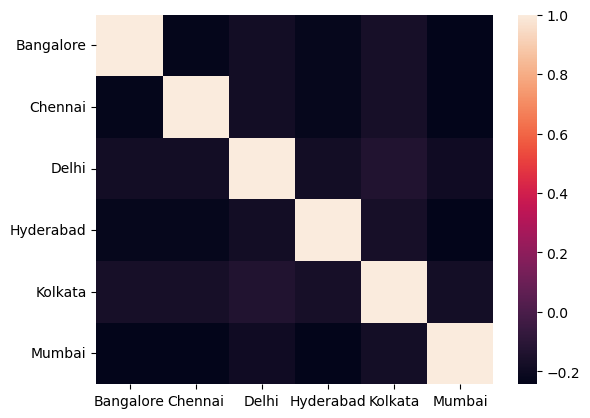

In [203]:
import seaborn as sns
sns.heatmap(df_city.corr())

In [204]:
df_city.drop(['Mumbai'], axis=1, inplace=True)

In [205]:
df_city

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0
4742,0.0,0.0,0.0,1.0,0.0
4743,0.0,0.0,0.0,1.0,0.0
4744,0.0,0.0,0.0,1.0,0.0


In [206]:
df_city.corr()

,Bangalore,Chennai,Delhi,Hyderabad,Kolkata
Bangalore,1.000000,-0.230330,-0.183125,-0.226662,-0.168783
Chennai,-0.230330,1.000000,-0.183760,-0.227448,-0.169369
Delhi,-0.183125,-0.183760,1.000000,-0.180834,-0.134658
Hyderabad,-0.226662,-0.227448,-0.180834,1.000000,-0.166672
Kolkata,-0.168783,-0.169369,-0.134658,-0.166672,1.000000


<Axes: >

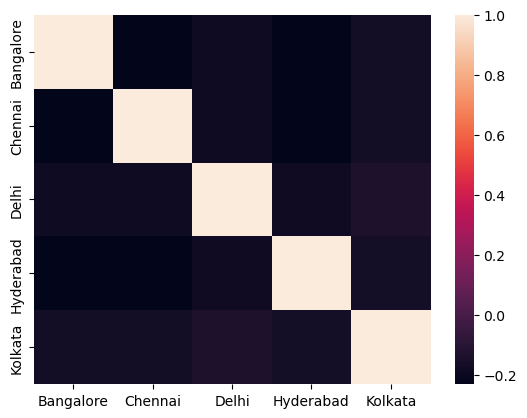

In [207]:
sns.heatmap(df_city.corr())

In [208]:
df=pd.concat([df,df_city], axis= 1) 

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int32  
 4   City               4746 non-null   object 
 5   Furnishing Status  4746 non-null   object 
 6   Tenant Preferred   4746 non-null   object 
 7   Bathroom           4746 non-null   int64  
 8   Point of Contact   4746 non-null   object 
 9   Bangalore          4746 non-null   float64
 10  Chennai            4746 non-null   float64
 11  Delhi              4746 non-null   float64
 12  Hyderabad          4746 non-null   float64
 13  Kolkata            4746 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(4)
memory usage: 500.7+ KB


In [210]:
df.drop(['City'], axis= 1, inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int32  
 4   Furnishing Status  4746 non-null   object 
 5   Tenant Preferred   4746 non-null   object 
 6   Bathroom           4746 non-null   int64  
 7   Point of Contact   4746 non-null   object 
 8   Bangalore          4746 non-null   float64
 9   Chennai            4746 non-null   float64
 10  Delhi              4746 non-null   float64
 11  Hyderabad          4746 non-null   float64
 12  Kolkata            4746 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(3)
memory usage: 463.6+ KB


In [212]:
df['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
furnished_le=LabelEncoder()

In [215]:
df['Furnishing Status']=furnished_le.fit_transform(df['Furnishing Status'])

In [216]:
df['Furnishing Status'].value_counts()

Furnishing Status
1    2251
2    1815
0     680
Name: count, dtype: int64

In [217]:
df['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [218]:
from sklearn.preprocessing import OneHotEncoder

In [219]:
ohe_tenantpref=OneHotEncoder(sparse_output= False)

In [220]:
arr= ohe_tenantpref.fit_transform(df[['Tenant Preferred']])
arr

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [221]:
cols=ohe_tenantpref.categories_[0]
cols

array(['Bachelors', 'Bachelors/Family', 'Family'], dtype=object)

In [222]:
df_tenant=pd.DataFrame(arr, columns=cols)
df_tenant

,Bachelors,Bachelors/Family,Family
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
4741,0.0,1.0,0.0
4742,0.0,1.0,0.0
4743,0.0,1.0,0.0
4744,0.0,0.0,1.0


In [223]:
df_tenant.corr()

,Bachelors,Bachelors/Family,Family
Bachelors,1.000000,-0.748762,-0.152993
Bachelors/Family,-0.748762,1.000000,-0.540480
Family,-0.152993,-0.540480,1.000000


<Axes: >

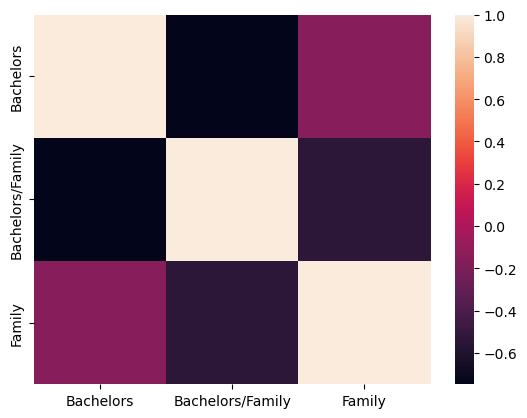

In [224]:
import seaborn as sns
sns.heatmap(df_tenant.corr())

In [225]:
df_tenant.drop(['Bachelors'], axis=1, inplace=True)
df_tenant

,Bachelors/Family,Family
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
4741,1.0,0.0
4742,1.0,0.0
4743,1.0,0.0
4744,0.0,1.0


In [226]:
df_tenant.corr()

,Bachelors/Family,Family
Bachelors/Family,1.00000,-0.54048
Family,-0.54048,1.00000


<Axes: >

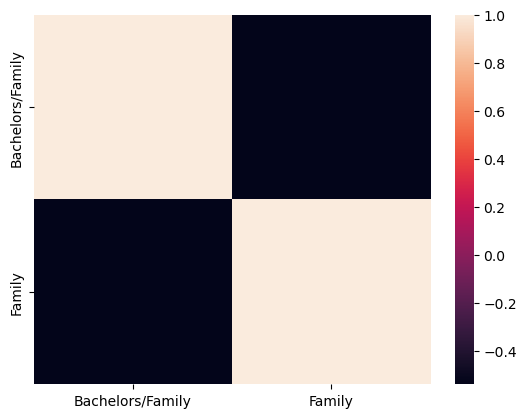

In [227]:
sns.heatmap(df_tenant.corr())

In [230]:
df=pd.concat([df,df_tenant], axis= 1) 

In [231]:
df.drop('Tenant Preferred', axis= 1, inplace=True)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int32  
 4   Furnishing Status  4746 non-null   int32  
 5   Bathroom           4746 non-null   int64  
 6   Point of Contact   4746 non-null   object 
 7   Bangalore          4746 non-null   float64
 8   Chennai            4746 non-null   float64
 9   Delhi              4746 non-null   float64
 10  Hyderabad          4746 non-null   float64
 11  Kolkata            4746 non-null   float64
 12  Bachelors/Family   4746 non-null   float64
 13  Family             4746 non-null   float64
dtypes: float64(7), int32(2), int64(4), object(1)
memory usage: 482.1+ KB


In [233]:
df['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

In [234]:
df.replace(to_replace=['Contact Builder'], value=['Contact Agent'], inplace= True)

In [235]:
df['Point of Contact'].value_counts()

Point of Contact
Contact Owner    3216
Contact Agent    1530
Name: count, dtype: int64

In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
point_le=LabelEncoder()

In [240]:
df['Point of Contact']=point_le.fit_transform(df['Point of Contact'])

In [241]:
df['Point of Contact'].value_counts()

Point of Contact
1    3216
0    1530
Name: count, dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int32  
 4   Furnishing Status  4746 non-null   int32  
 5   Bathroom           4746 non-null   int64  
 6   Point of Contact   4746 non-null   int32  
 7   Bangalore          4746 non-null   float64
 8   Chennai            4746 non-null   float64
 9   Delhi              4746 non-null   float64
 10  Hyderabad          4746 non-null   float64
 11  Kolkata            4746 non-null   float64
 12  Bachelors/Family   4746 non-null   float64
 13  Family             4746 non-null   float64
dtypes: float64(7), int32(3), int64(4)
memory usage: 463.6 KB


In [243]:
import matplotlib.pyplot as plt

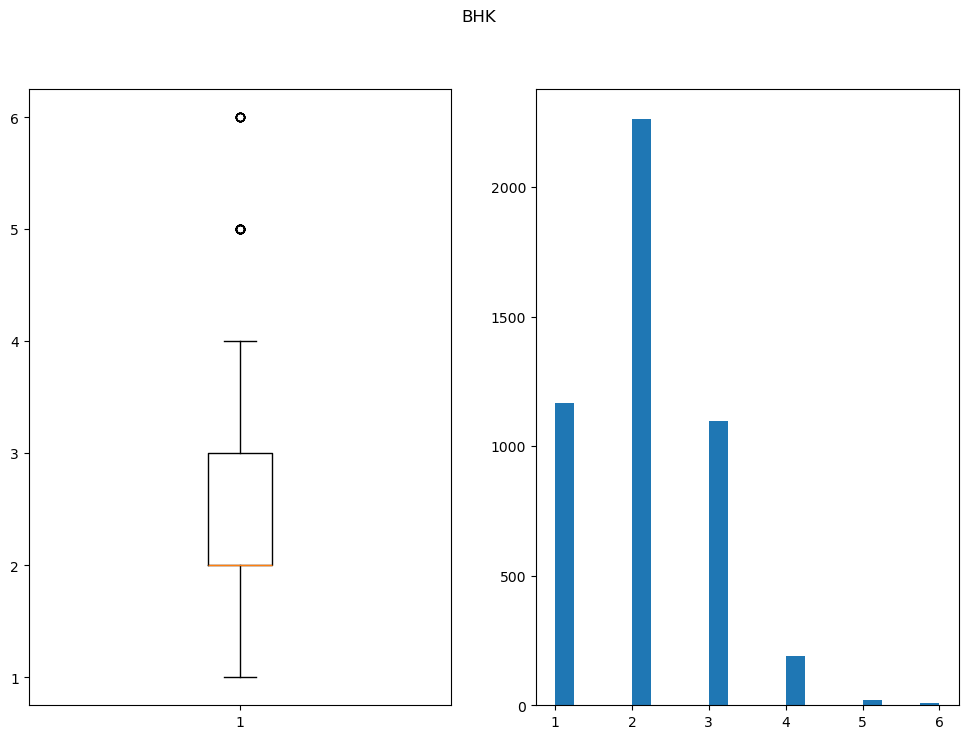

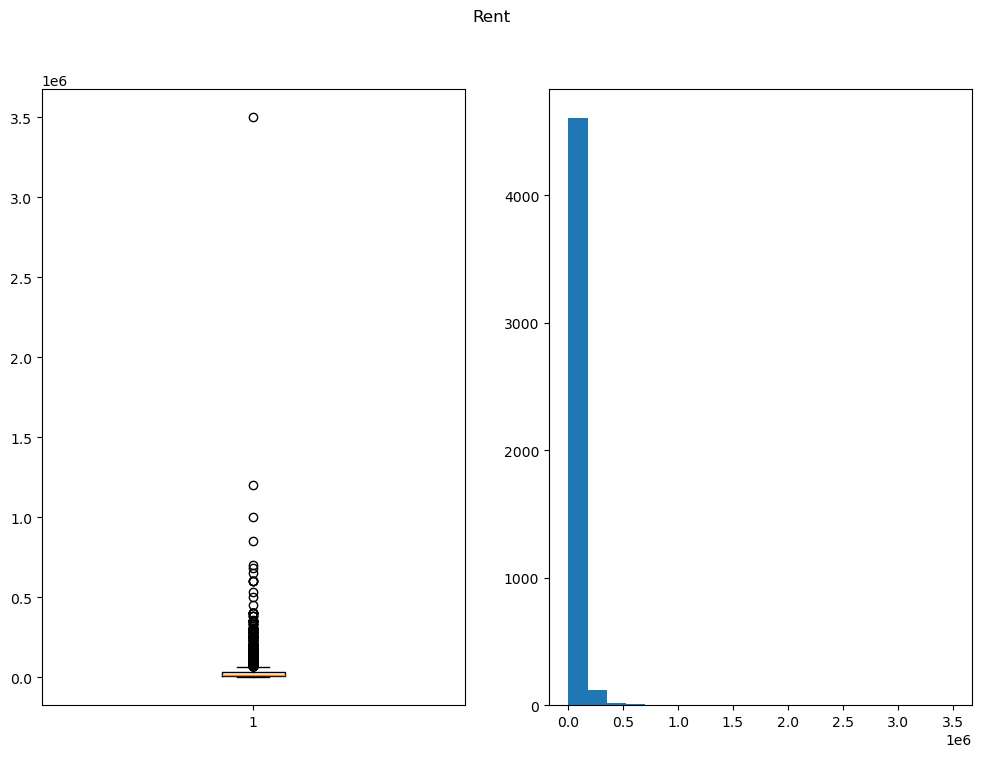

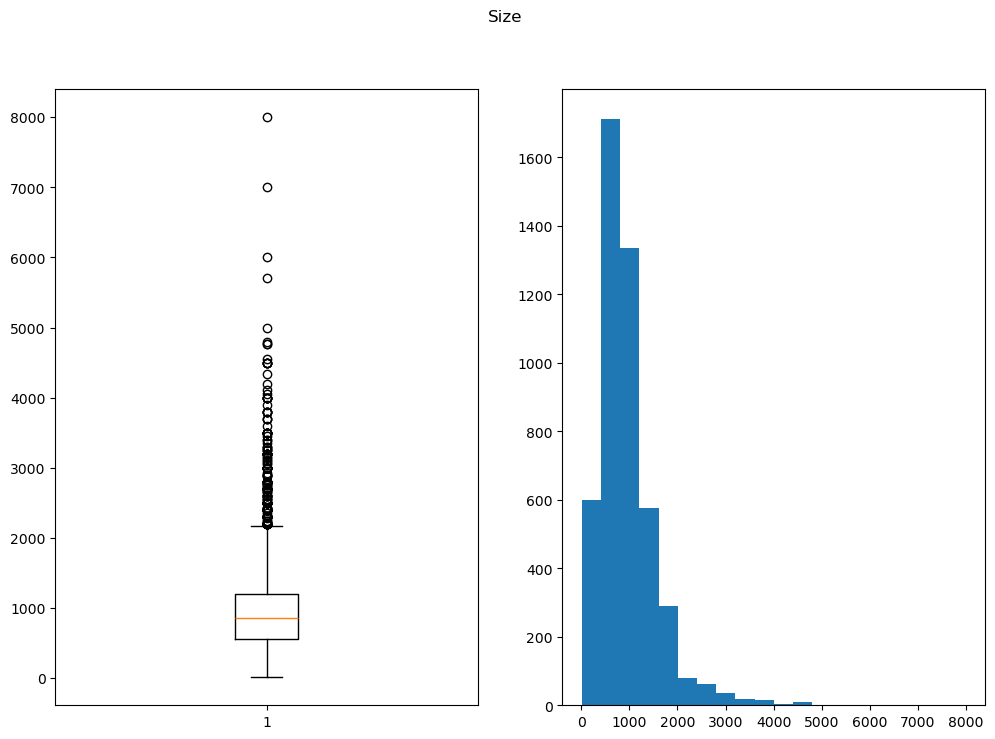

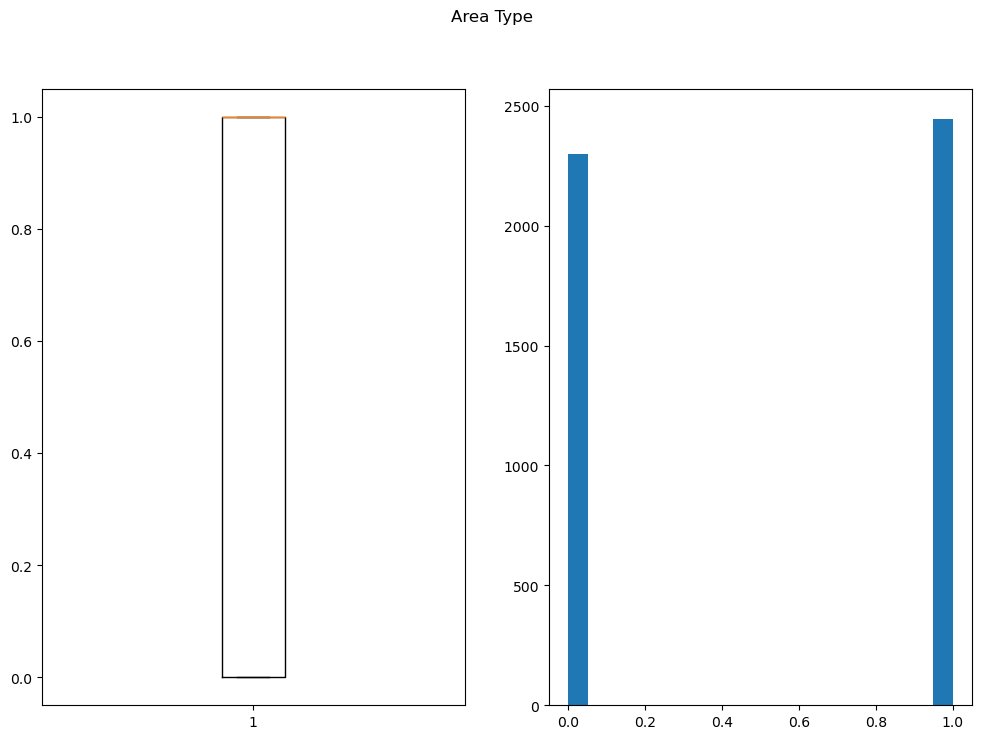

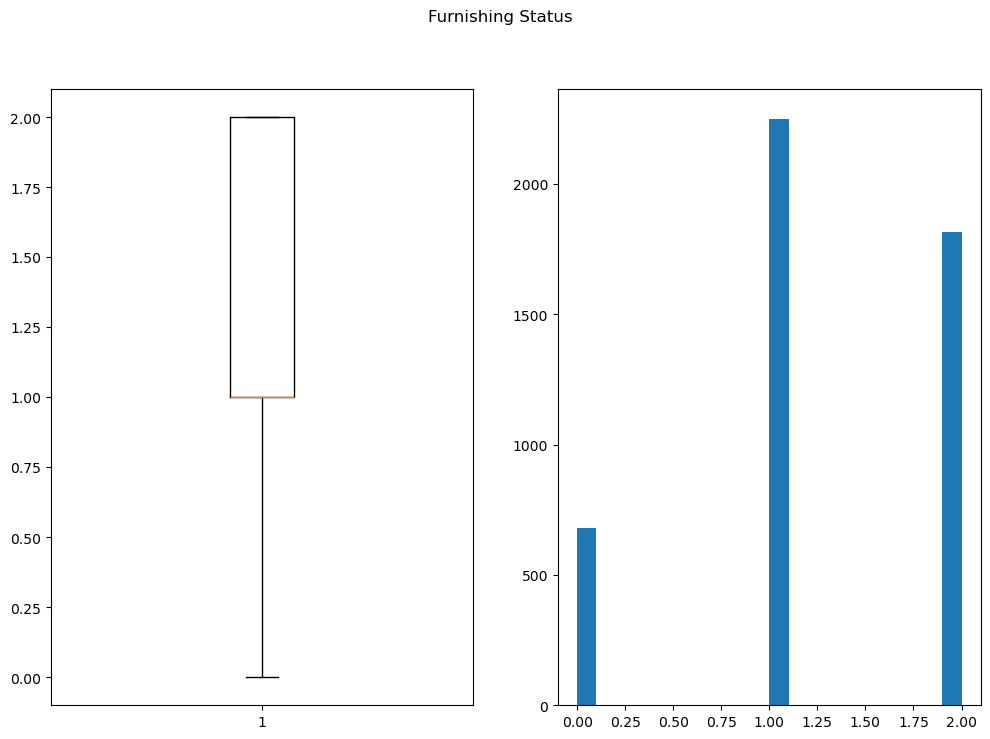

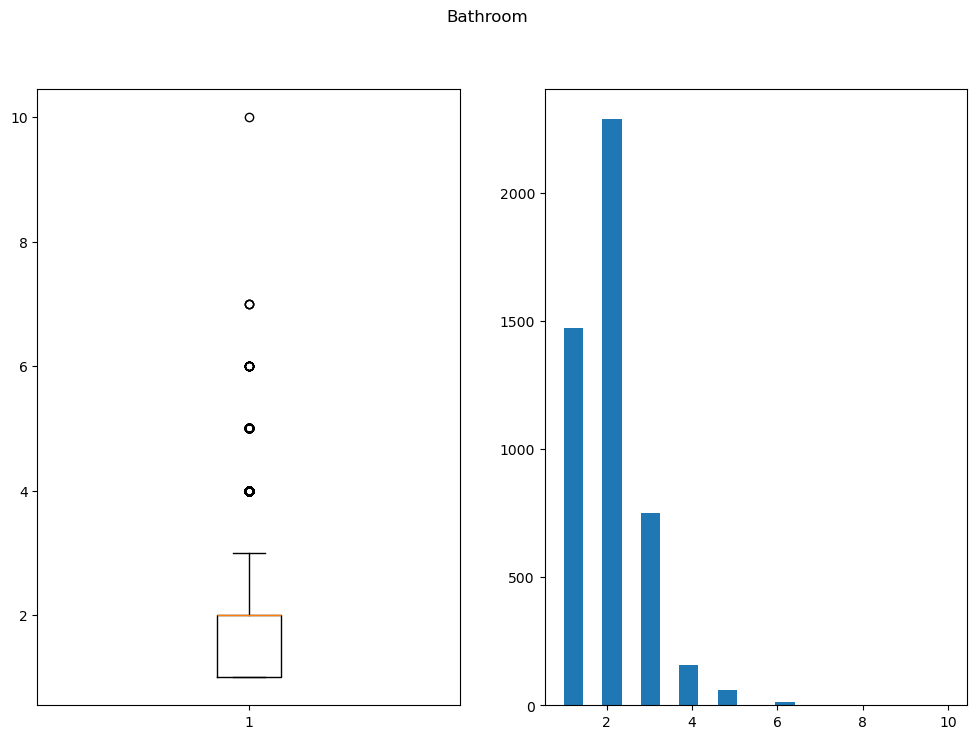

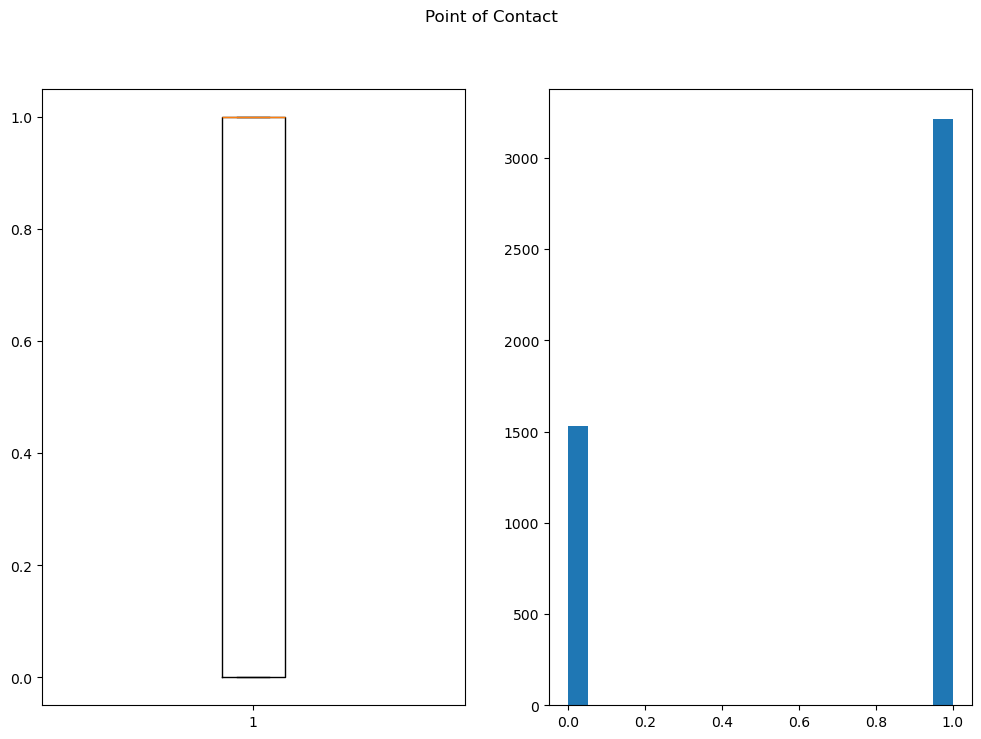

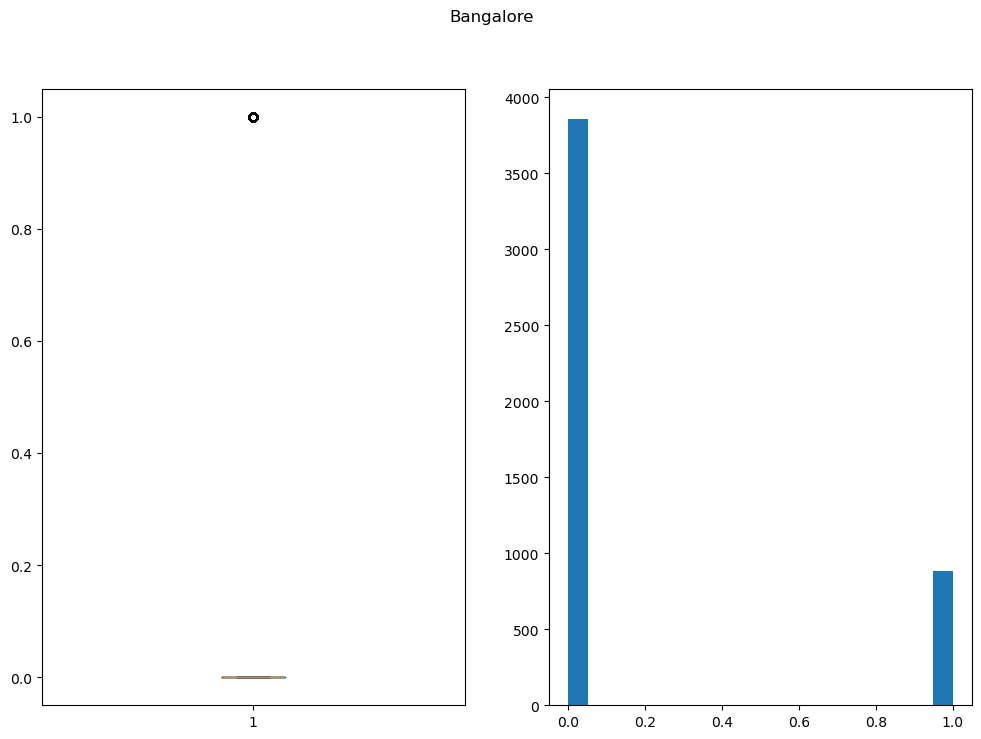

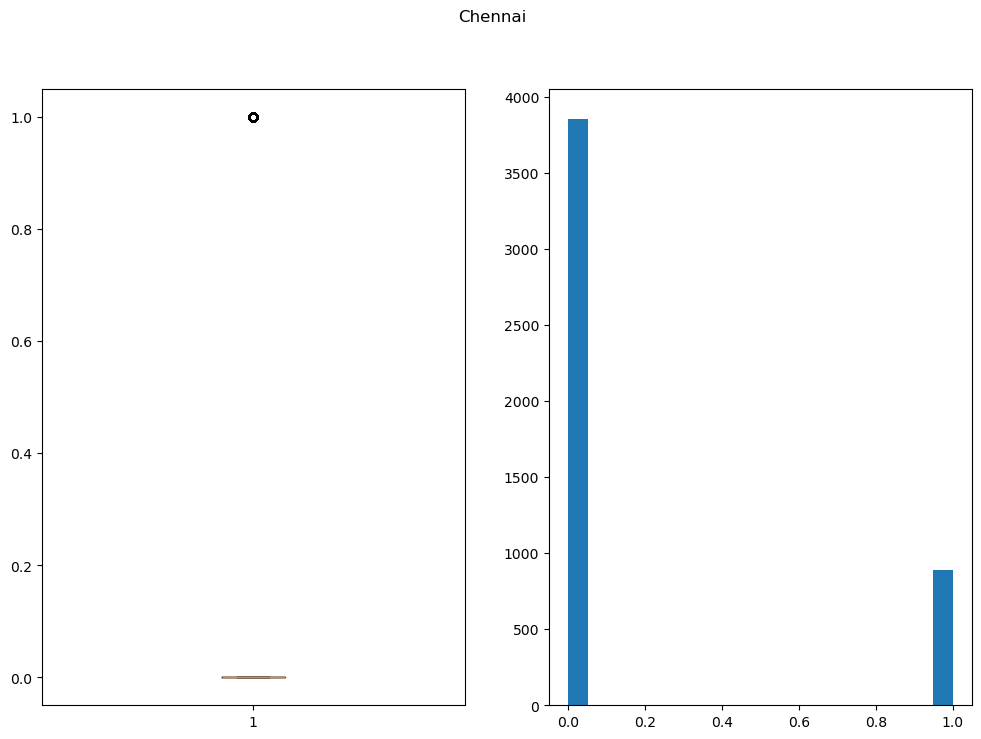

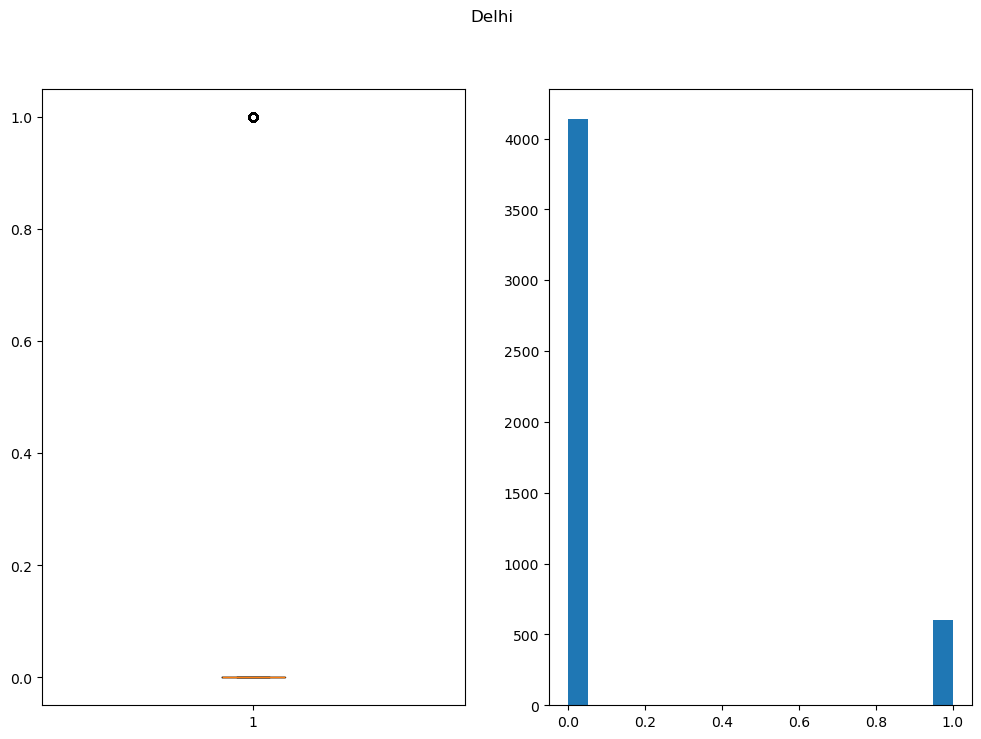

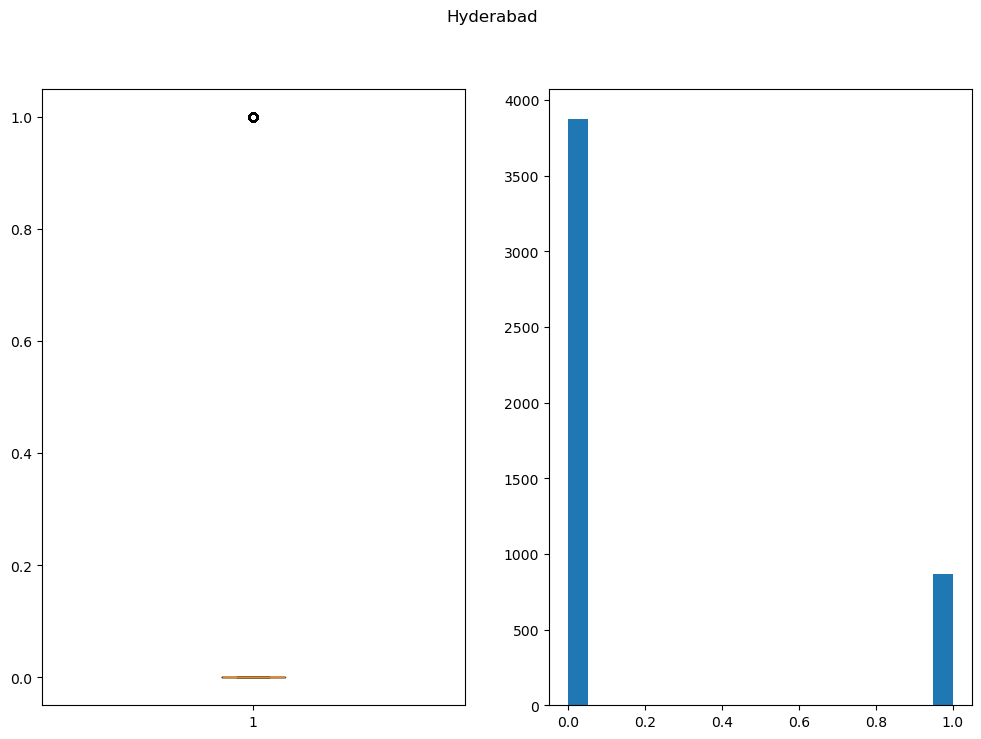

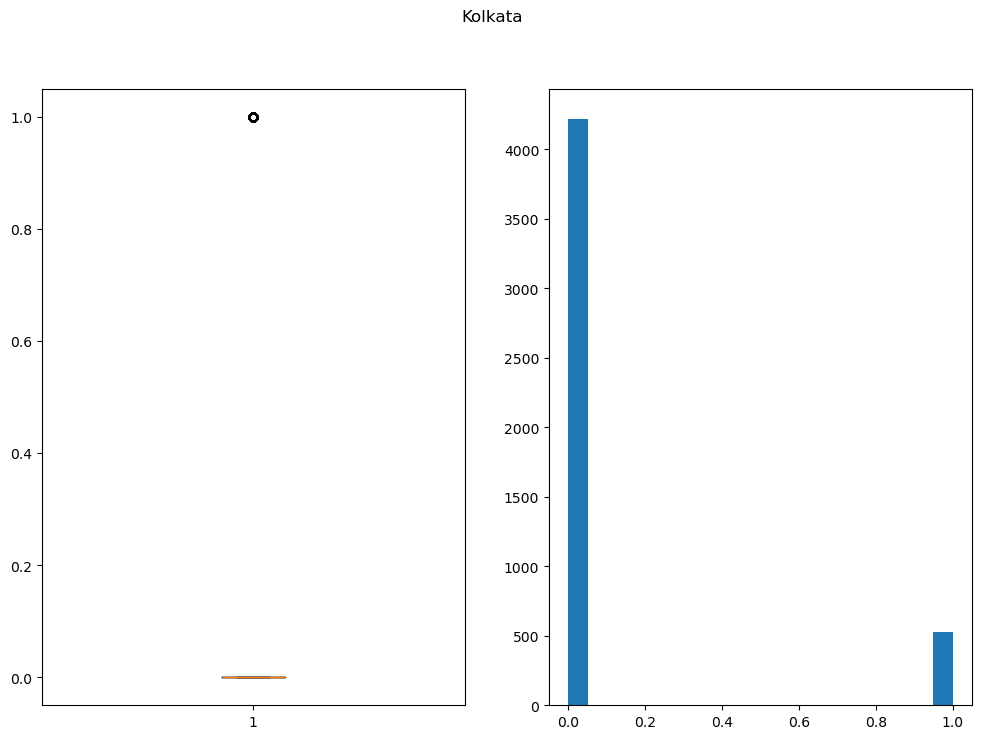

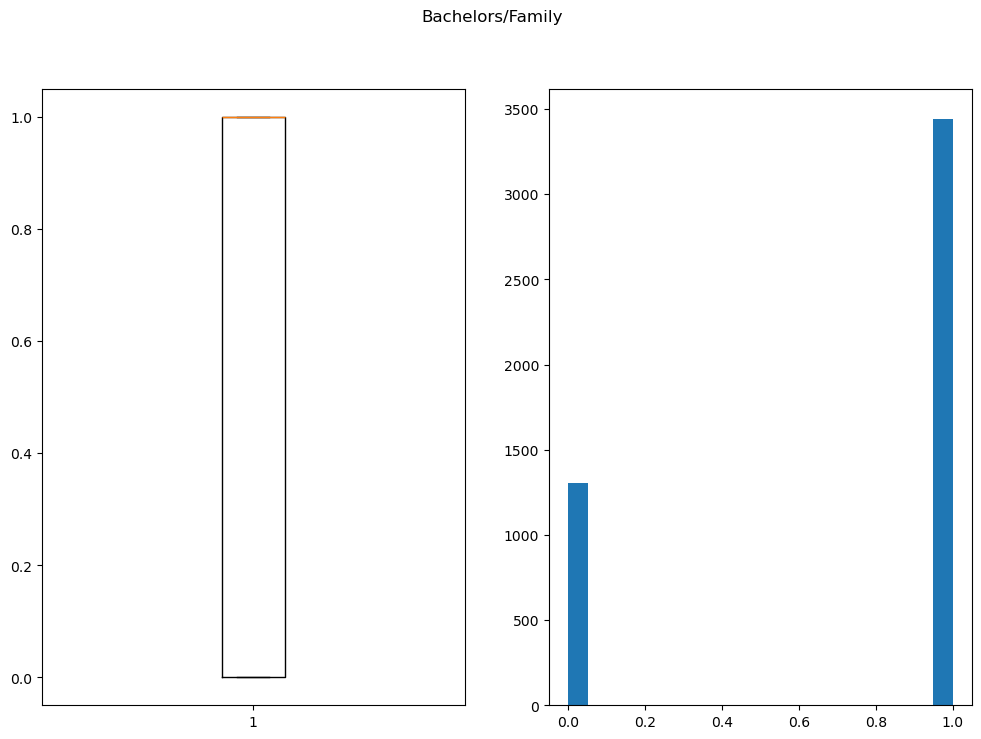

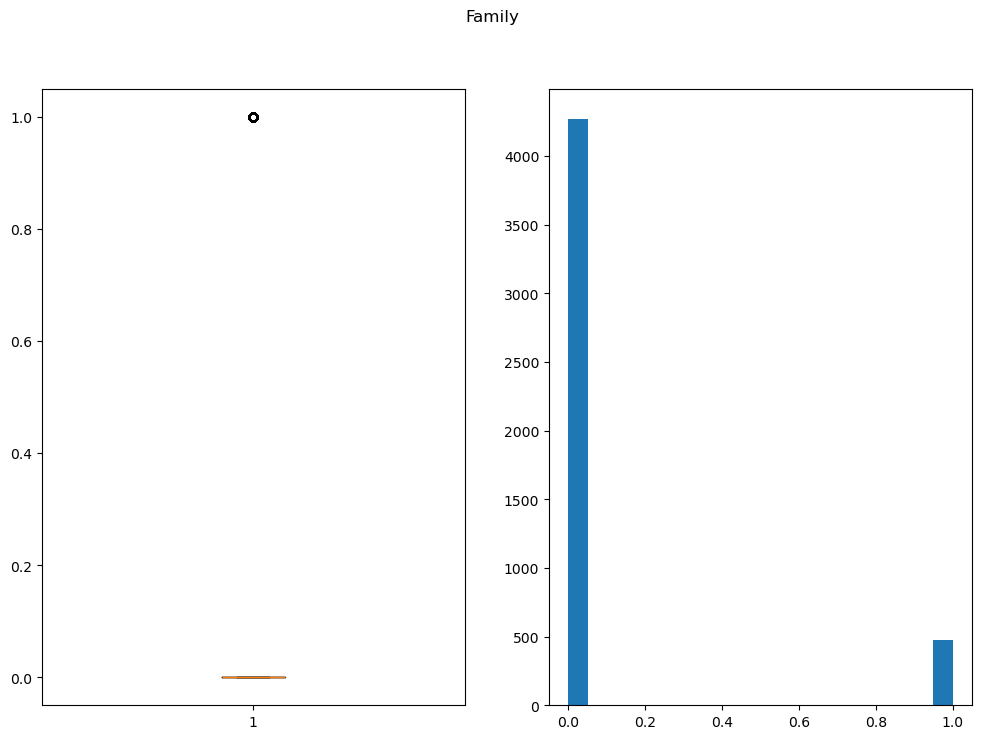

In [246]:
for i in df.columns:
    fig, ax=plt.subplots(1, 2, figsize=(12,8))
    ax[0].boxplot(df[i])
    ax[1].hist(df[i], bins =20)
    plt.suptitle(i)
    plt.show()

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   int32  
 4   Furnishing Status  4746 non-null   int32  
 5   Bathroom           4746 non-null   int64  
 6   Point of Contact   4746 non-null   int32  
 7   Bangalore          4746 non-null   float64
 8   Chennai            4746 non-null   float64
 9   Delhi              4746 non-null   float64
 10  Hyderabad          4746 non-null   float64
 11  Kolkata            4746 non-null   float64
 12  Bachelors/Family   4746 non-null   float64
 13  Family             4746 non-null   float64
dtypes: float64(7), int32(3), int64(4)
memory usage: 463.6 KB


In [248]:
X=df.drop('Rent', axis =1)
X

,BHK,Size,Area Type,Furnishing Status,Bathroom,Point of Contact,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Bachelors/Family,Family
0,2,1100,1,2,2,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,800,1,1,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,1000,1,1,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,800,1,2,1,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,850,0,2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,0,1,2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4742,3,2000,1,1,3,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4743,3,1750,0,1,3,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4744,3,1500,0,1,2,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [249]:
y=df['Rent']

In [250]:
X=X.values
y=y.values

In [251]:
type(X)

numpy.ndarray

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
scale= StandardScaler()

In [254]:
X_transformed= scale.fit_transform(X)
X_transformed

array([[-0.10077301,  0.2089605 ,  0.9696962 , ...,  2.83852989,
         0.61485672, -0.3323179 ],
       [-0.10077301, -0.26412451,  0.9696962 , ...,  2.83852989,
         0.61485672, -0.3323179 ],
       [-0.10077301,  0.0512655 ,  0.9696962 , ...,  2.83852989,
         0.61485672, -0.3323179 ],
       ...,
       [ 1.10090711,  1.233978  , -1.03125082, ..., -0.35229504,
         0.61485672, -0.3323179 ],
       [ 1.10090711,  0.8397405 , -1.03125082, ..., -0.35229504,
        -1.62639518,  3.00916679],
       [-0.10077301,  0.0512655 , -1.03125082, ..., -0.35229504,
        -1.62639518, -0.3323179 ]])

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=10)

In [260]:
X_train.shape

(3322, 13)

In [261]:
X_test.shape

(1424, 13)

In [262]:
y_train.shape

(3322,)

In [263]:
y_test.shape

(1424,)

In [264]:
from sklearn.linear_model import LinearRegression

In [265]:
lr=LinearRegression() # model ko bolay samajjh le
lr.fit(X_train, y_train)

LinearRegression()

In [267]:
y_pred_train = lr.predict(X_train)

In [268]:
import sklearn.metrics as sm

In [269]:
sm.mean_squared_error(y_train, y_pred_train)

5319601600.07349

In [270]:
sm.r2_score(y_train, y_pred_train)

0.2725666928727669

In [271]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=14)
dt.fit(X_train, y_train)
dt_pred_training=dt.predict(X_train)

In [272]:
sm.mean_squared_error(y_train, dt_pred_training)

110598443.25658335

In [273]:
sm.r2_score(y_train, dt_pred_training)

0.9848761246819407

In [274]:
dt_pred_testing=dt.predict(X_test)

In [275]:
sm.mean_squared_error(y_test, dt_pred_testing)

17058698137.52685

In [276]:
sm.r2_score(y_test, dt_pred_testing)

-4.219757495664575

In [278]:
from sklearn.model_selection import GridSearchCV
grid={
    'max_depth':[2,4,6,8,10,12,14,16,18,20],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[2,4,6,8,10,12,14,16,18],
    'max_features':["sqrt",'log2'],
    'criterion':['squared_error']
}

dtree= DecisionTreeRegressor()

In [279]:
grid_model= GridSearchCV(estimator= dtree, param_grid=grid, cv=5)

In [281]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [282]:
grid_train_p= grid_model.predict(X_train)

In [284]:
print("RMSE",sm.mean_squared_error(y_test, dt_pred_testing)**0.5)
print("R2",sm.r2_score(y_test, dt_pred_testing))

RMSE 130608.95121517073
R2 -4.219757495664575


In [285]:
grid_test_p= grid_model.predict(X_test)

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [302]:
rforest= RandomForestRegressor(max_depth=6)
rforest.fit(X_train, y_train)
y_rforest_train=rforest.predict(X_train)

In [303]:
print("RMSE",sm.mean_squared_error(y_train, y_rforest_train)**0.5)
print("R2",sm.r2_score(y_train, y_rforest_train ))

RMSE 42558.50977268422
R2 0.7523223040512154


In [304]:
y_rforest_test=rforest.predict(X_test)

In [305]:
print("RMSE",sm.mean_squared_error(y_test, y_rforest_test)**0.5)
print("R2",sm.r2_score(y_test, y_rforest_test ))

RMSE 50923.74244842544
R2 0.20650340333077377


In [306]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=14)
gbr.fit(X_train, y_train)
gbr_train=gbr.predict(X_train)

In [308]:
print("RMSE",sm.mean_squared_error(y_train, gbr_train)**0.5)
print("R2",sm.r2_score(y_train, gbr_train ))

RMSE 6215.380262182295
R2 0.9947173786421294


In [310]:
gbr_test=gbr.predict(X_test)
print("RMSE",sm.mean_squared_error(y_test, gbr_test)**0.5)
print("R2",sm.r2_score(y_test, gbr_test ))

RMSE 129532.52990024915
R2 -4.134074165009229


In [314]:
from sklearn.neighbors import KNeighborsRegressor

In [316]:
Knn=KNeighborsRegressor(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsRegressor()

In [317]:
Knn_train=Knn.predict(X_train)

In [ ]:
print('RMSE',sm.mean_squared_error(y_train, y_))